# OpenCV Practice: Drawing Shapes, Text, and Pixel Operations

This notebook covers the following OpenCV concepts:
- Drawing shapes (lines, rectangles, circles)
- Adding text to images
- Pixel operations and manipulation
- Brightness adjustment
- Image arithmetic operations
- Image blending

**Note:** Remember that OpenCV uses BGR color format, not RGB!

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter notebook
def show_image(img, title="Image", figsize=(10, 6)):
    """Display image in Jupyter notebook using matplotlib"""
    plt.figure(figsize=figsize)
    if len(img.shape) == 3:
        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images(images, titles, figsize=(15, 5)):
    """Display multiple images side by side"""
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    if len(images) == 1:
        axes = [axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 3:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)
        else:
            axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Drawing Shapes Practice

Let's practice drawing various shapes using OpenCV functions:
- `cv2.line(img, pt1, pt2, color, thickness)`
- `cv2.rectangle(img, pt1, pt2, color, thickness)`
- `cv2.circle(img, center, radius, color, thickness)`

**Remember:** Use thickness = -1 for filled shapes!

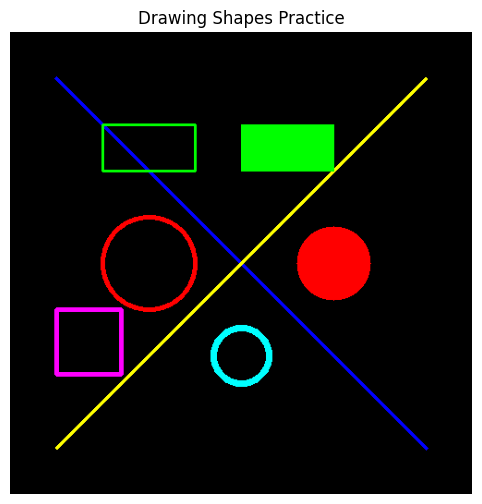

In [2]:
# Create a blank black image (500x500 pixels, 3 channels for BGR)
img = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw a blue line from (50, 50) to (450, 450)
cv2.line(img, (50, 50), (450, 450), (255, 0, 0), 3)  # Blue line, thickness 3

# Draw another line - diagonal from top-right to bottom-left
cv2.line(img, (450, 50), (50, 450), (0, 255, 255), 2)  # Yellow line, thickness 2

# Draw a green rectangle (outline)
cv2.rectangle(img, (100, 100), (200, 150), (0, 255, 0), 2)  # Green outline, thickness 2

# Draw a filled green rectangle
cv2.rectangle(img, (250, 100), (350, 150), (0, 255, 0), -1)  # Filled green rectangle

# Draw a red circle (outline)
cv2.circle(img, (150, 250), 50, (0, 0, 255), 3)  # Red circle outline, radius 50, thickness 3

# Draw a filled red circle
cv2.circle(img, (350, 250), 40, (0, 0, 255), -1)  # Filled red circle, radius 40

# Experiment with different colors and thicknesses
cv2.circle(img, (250, 350), 30, (255, 255, 0), 5)  # Cyan circle, thick outline
cv2.rectangle(img, (50, 300), (120, 370), (255, 0, 255), 4)  # Magenta rectangle

show_image(img, "Drawing Shapes Practice")

## 2. Drawing Text Practice

Learn to add text to images using `cv2.putText()`:
- Different font types
- Various font scales
- Anti-aliased text for smoother appearance

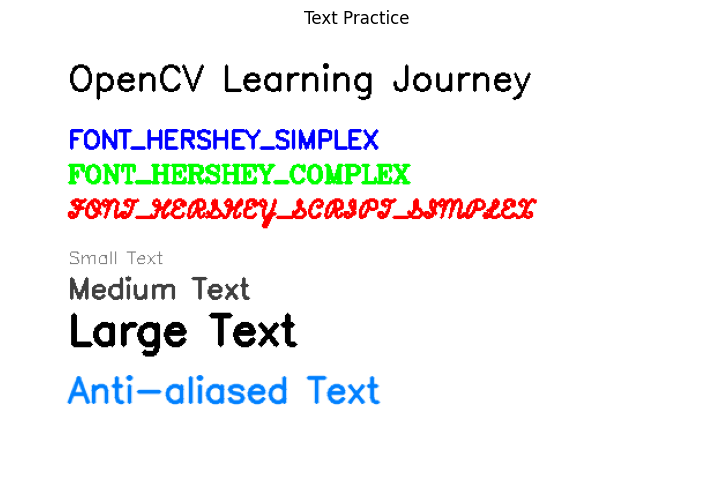

In [3]:
# Create a blank white image for better text visibility
img_text = np.ones((400, 600, 3), dtype=np.uint8) * 255

# Add your name (replace with your actual name)
cv2.putText(img_text, 'OpenCV Learning Journey', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Try different fonts
cv2.putText(img_text, 'FONT_HERSHEY_SIMPLEX', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
cv2.putText(img_text, 'FONT_HERSHEY_COMPLEX', (50, 130), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_text, 'FONT_HERSHEY_SCRIPT_SIMPLEX', (50, 160), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.7, (0, 0, 255), 2)

# Different scales
cv2.putText(img_text, 'Small Text', (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (128, 128, 128), 1)
cv2.putText(img_text, 'Medium Text', (50, 230), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (64, 64, 64), 2)
cv2.putText(img_text, 'Large Text', (50, 270), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 3)

# Anti-aliased text (smoother)
cv2.putText(img_text, 'Anti-aliased Text', (50, 320), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 128, 0), 2, cv2.LINE_AA)

show_image(img_text, "Text Practice")

## 3. Adding Text to Existing Images

Practice adding labels and annotations to existing images.

Successfully loaded: C:\Users\pc\Desktop\90DayML\openCV\cat_PNG118.png


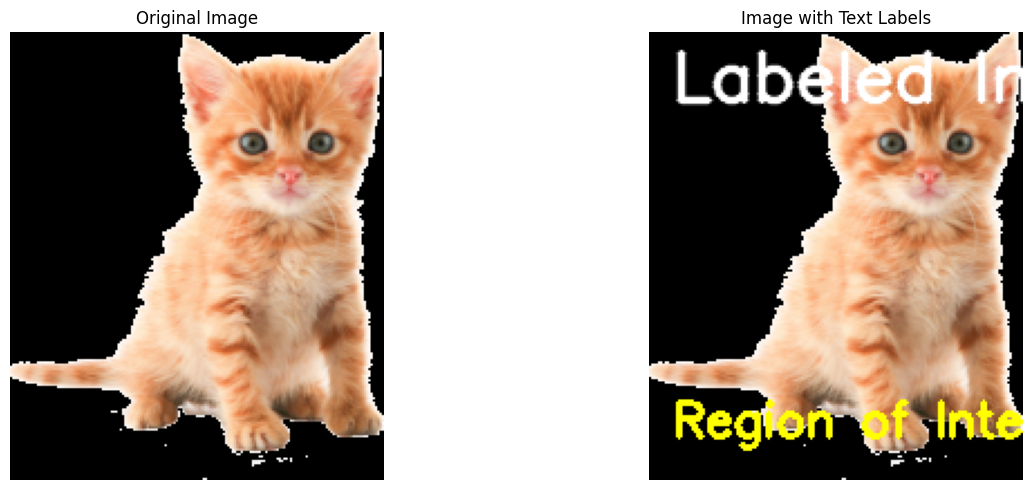

In [4]:
# Try to load an existing image
img_paths = [
    r'C:\Users\pc\Desktop\90DayML\openCV\cat_PNG118.png',
    r'C:\Users\pc\Desktop\90DayML\openCV\cat-cat-meme.jpg',
    r'C:\Users\pc\Desktop\90DayML\openCV\dog.jpg'
]

img_with_text = None
for path in img_paths:
    try:
        img_with_text = cv2.imread(path)
        if img_with_text is not None:
            print(f"Successfully loaded: {path}")
            break
    except:
        continue

if img_with_text is None:
    print("No images found, creating a sample image")
    img_with_text = np.random.randint(0, 256, (300, 400, 3), dtype=np.uint8)

# Make a copy to preserve original
original_img = img_with_text.copy()

# Add label text
cv2.putText(img_with_text, 'Labeled Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(img_with_text, 'Region of Interest', (10, img_with_text.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

show_images([original_img, img_with_text], ['Original Image', 'Image with Text Labels'])

## 4. Pixel Operations Practice

Learn direct pixel access and manipulation:
- Individual pixel modification
- Block pixel operations
- Using both slicing and iteration methods

In [ ]:
# Load an image or create a sample one
try:
    pixel_img = cv2.imread(r'C:\Users\pc\Desktop\90DayML\openCV\cat_PNG118.png')
    if pixel_img is None:
        pixel_img = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)
        print("Created sample image for pixel operations")
    else:
        print("Using loaded image for pixel operations")
        # Resize if too large
        if pixel_img.shape[0] > 300 or pixel_img.shape[1] > 300:
            pixel_img = cv2.resize(pixel_img, (200, 200))
except:
    pixel_img = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)
    print("Created sample image for pixel operations")

# Make a copy to preserve original
original_pixel = pixel_img.copy()
modified_pixel = pixel_img.copy()

# Manually change individual pixels
modified_pixel[50, 50] = [0, 0, 255]  # Red pixel
modified_pixel[51, 50] = [0, 255, 0]  # Green pixel
modified_pixel[52, 50] = [255, 0, 0]  # Blue pixel

# Change a 5x5 block using slicing
modified_pixel[100:105, 100:105] = [255, 255, 0]  # Cyan 5x5 block

# Change a 5x5 block using iteration (alternative method)
for y in range(120, 125):
    for x in range(120, 125):
        modified_pixel[y, x] = [255, 0, 255]  # Magenta 5x5 block

show_images([original_pixel, modified_pixel], ['Original Image', 'Modified Pixels'])

## 5. Brightness Adjustment Practice

Learn safe brightness adjustment using OpenCV functions:
- `cv2.add()` for brightening (handles clipping)
- `cv2.subtract()` for darkening (handles clipping)
- Comparison with NumPy operations (showing wrap-around issues)

In [ ]:
# Create or load an image for brightness adjustment
try:
    brightness_img = cv2.imread(r'C:\Users\pc\Desktop\90DayML\openCV\cat_PNG118.png')
    if brightness_img is None:
        brightness_img = np.random.randint(50, 200, (200, 300, 3), dtype=np.uint8)
        print("Created sample image for brightness adjustment")
    else:
        # Resize if too large
        if brightness_img.shape[0] > 300:
            brightness_img = cv2.resize(brightness_img, (300, 200))
except:
    brightness_img = np.random.randint(50, 200, (200, 300, 3), dtype=np.uint8)
    print("Created sample image for brightness adjustment")

# Brighten image using cv2.add (safe, handles clipping)
bright_img = cv2.add(brightness_img, np.array([50, 50, 50]))

# Darken image using cv2.subtract (safe, handles clipping)
dark_img = cv2.subtract(brightness_img, np.array([30, 30, 30]))

# Demonstrate the difference between OpenCV and NumPy operations
# WARNING: NumPy addition can cause wrap-around (don't use for brightness)
numpy_add = brightness_img + 50  # This can cause wrap-around issues

# Clip numpy result to show the difference
numpy_add = np.clip(numpy_add, 0, 255).astype(np.uint8)

show_images([brightness_img, bright_img, dark_img, numpy_add], 
           ['Original', 'cv2.add +50', 'cv2.subtract -30', 'NumPy +50 (clipped)'])

## 6. Image Arithmetic Practice

Practice combining images using:
- `cv2.add()` for adding images
- `cv2.subtract()` for subtracting images

In [ ]:
# Create two simple images
img1 = np.zeros((300, 300, 3), dtype=np.uint8)
img2 = np.zeros((300, 300, 3), dtype=np.uint8)

# Add a white square to img1
cv2.rectangle(img1, (50, 50), (150, 150), (255, 255, 255), -1)

# Add a white circle to img2
cv2.circle(img2, (200, 200), 50, (255, 255, 255), -1)

# Add the images
added = cv2.add(img1, img2)

# Subtract img2 from img1
subtracted = cv2.subtract(img1, img2)

show_images([img1, img2, added, subtracted], 
           ['Image 1 (Square)', 'Image 2 (Circle)', 'cv2.add(img1, img2)', 'cv2.subtract(img1, img2)'])

## 7. Image Blending Practice

Learn to blend images using `cv2.addWeighted()`:
- Different weight combinations
- Adding brightness to blended images
- Formula: `output = img1 * alpha + img2 * beta + gamma`

In [ ]:
# Try to load the specified images
img1_path = r'C:\Users\pc\Desktop\90DayML\openCV\cat_PNG118.png'
img2_path = r'C:\Users\pc\Desktop\90DayML\openCV\cat-cat-meme.jpg'
img3_path = r'C:\Users\pc\Desktop\90DayML\openCV\dog.jpg'

blend_img1 = cv2.imread(img1_path)
blend_img2 = cv2.imread(img2_path)
blend_img3 = cv2.imread(img3_path)

# Check which images loaded successfully
available_images = []
if blend_img1 is not None:
    available_images.append(('Cat PNG', blend_img1))
if blend_img2 is not None:
    available_images.append(('Cat Meme', blend_img2))
if blend_img3 is not None:
    available_images.append(('Dog', blend_img3))

if len(available_images) >= 2:
    # Use the first two available images
    name1, img1_blend = available_images[0]
    name2, img2_blend = available_images[1]
    
    # Resize images to the same size for blending
    height, width = 300, 300
    img1_resized = cv2.resize(img1_blend, (width, height))
    img2_resized = cv2.resize(img2_blend, (width, height))
    
    # Blend with different weights
    blend1 = cv2.addWeighted(img1_resized, 0.7, img2_resized, 0.3, 0)  # 70% img1, 30% img2
    blend2 = cv2.addWeighted(img1_resized, 0.5, img2_resized, 0.5, 0)  # 50% each
    blend3 = cv2.addWeighted(img1_resized, 0.3, img2_resized, 0.7, 0)  # 30% img1, 70% img2
    
    # Add some brightness to the blend
    blend4 = cv2.addWeighted(img1_resized, 0.5, img2_resized, 0.5, 30)  # 50% each + 30 brightness
    
    # Display original images
    show_images([img1_resized, img2_resized], [f'{name1}', f'{name2}'])
    
    # Display blended results
    show_images([blend1, blend2, blend3, blend4], 
               ['70% img1, 30% img2', '50% each', '30% img1, 70% img2', '50% each + brightness'])
    
    print(f"Successfully blended {name1} and {name2}")
    
else:
    print("Not enough images found for blending. Creating sample images...")
    # Create sample images for blending
    sample_img1 = np.zeros((200, 200, 3), dtype=np.uint8)
    sample_img2 = np.zeros((200, 200, 3), dtype=np.uint8)
    
    # Make img1 red gradient
    for i in range(200):
        sample_img1[:, i] = [0, 0, i]
    
    # Make img2 blue gradient
    for i in range(200):
        sample_img2[i, :] = [i, 0, 0]
    
    # Blend them
    blended_sample = cv2.addWeighted(sample_img1, 0.5, sample_img2, 0.5, 0)
    
    show_images([sample_img1, sample_img2, blended_sample], 
               ['Sample Image 1', 'Sample Image 2', 'Blended (50% each)'])

## 8. Experiment Section

Use this section to experiment with different parameters and create your own variations!

In [ ]:
# Create your own experiments here!
# Try different:
# - Colors (remember BGR format)
# - Shapes and sizes
# - Text fonts and styles
# - Blending ratios
# - Brightness adjustments

experiment_img = np.zeros((400, 400, 3), dtype=np.uint8)

# Your code here...
# Example: Draw a smiley face
cv2.circle(experiment_img, (200, 200), 100, (0, 255, 255), 3)  # Face outline
cv2.circle(experiment_img, (170, 170), 10, (0, 255, 255), -1)  # Left eye
cv2.circle(experiment_img, (230, 170), 10, (0, 255, 255), -1)  # Right eye
cv2.ellipse(experiment_img, (200, 230), (30, 20), 0, 0, 180, (0, 255, 255), 3)  # Smile

show_image(experiment_img, "Your Experiment")

## Summary

In this notebook, you've learned:

1. **Drawing Shapes**: Lines, rectangles, and circles with various styles
2. **Adding Text**: Different fonts, sizes, and anti-aliasing
3. **Pixel Operations**: Direct pixel access and block modifications
4. **Brightness Adjustment**: Safe methods using OpenCV functions
5. **Image Arithmetic**: Adding and subtracting images
6. **Image Blending**: Combining images with different weights

### Key Takeaways:
- Always use BGR color format in OpenCV
- Use `cv2.add()` and `cv2.subtract()` for safe arithmetic operations
- Thickness = -1 fills shapes completely
- `cv2.LINE_AA` provides anti-aliased (smoother) text
- `cv2.addWeighted()` is perfect for blending images

### Next Steps:
- Experiment with different parameters in each cell
- Try loading your own images
- Combine multiple techniques in creative ways
- Practice with real-world image processing tasks